In [1]:
# Estimates Lasso and Elastic-Net regression models on a manually generated sparse signal corrupted with an additive noise.  

In [3]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

In [5]:
# Generate some sprase data to play with
np.random.seed(42)

n_samples, n_features = 50, 200
X = np.random.randn(n_samples, n_features)
coef = 3 * np.random.randn(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0 # sparsify coef
y = np.dot(X, coef)

# add noise
y += 0.01 * np.random.normal((n_samples,))

# Split data into training and test sets
n_samples = X.shape[0]
X_train, y_train = X[:n_samples/2], y[:n_samples/2]
X_test, y_test = X[n_samples/2:], y[n_samples/2:]

/Users/daniel/anaconda/envs/neural_nets/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/daniel/anaconda/envs/neural_nets/lib/python2.7/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [7]:
# Lasso
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print('R^2 on test data: {0}'.format(r2_score_lasso))

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
R^2 on test data: 0.384710361065


In [8]:
# Very bad!  Well not necessarily...see that's the interesting thing about the R2 score, in some cases a low value is not to be baulked at!

In [13]:
# Elastic net
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print('R2 on test data: {0}'.format(r2_score_enet))

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
R2 on test data: 0.240175777753


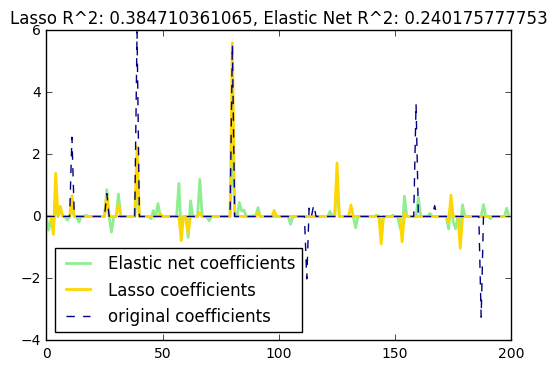

In [15]:
# Plot he results
plt.plot(enet.coef_, color='lightgreen', linewidth=2, label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2, label='Lasso coefficients')
plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title('Lasso R^2: {0}, Elastic Net R^2: {1}'.format(r2_score_lasso, r2_score_enet))